<a href="https://colab.research.google.com/github/gutzuh/Gerador-de-diagramas-venn/blob/main/Gerador_de_diagramas_venn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

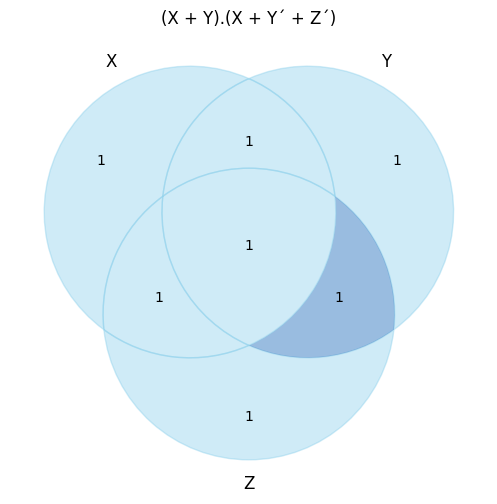

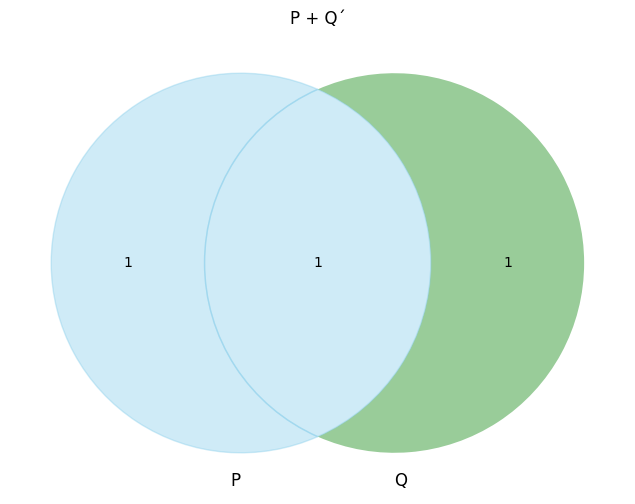

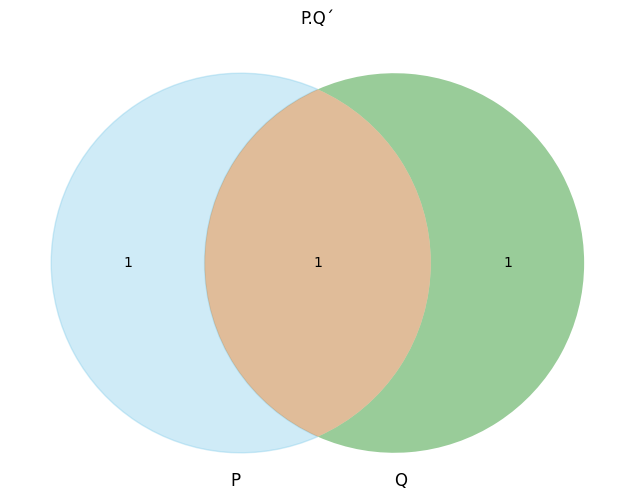

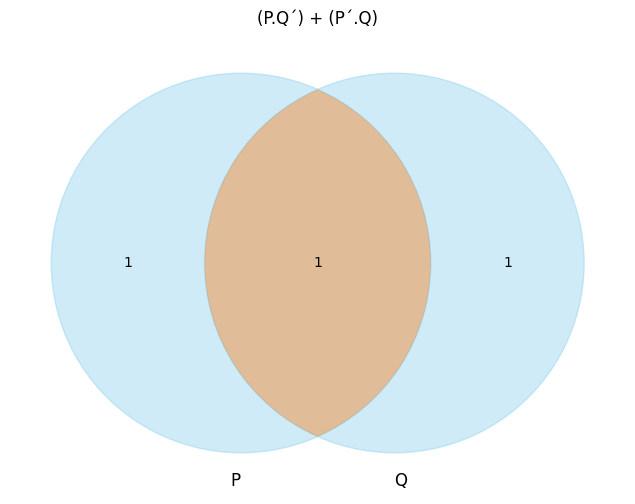

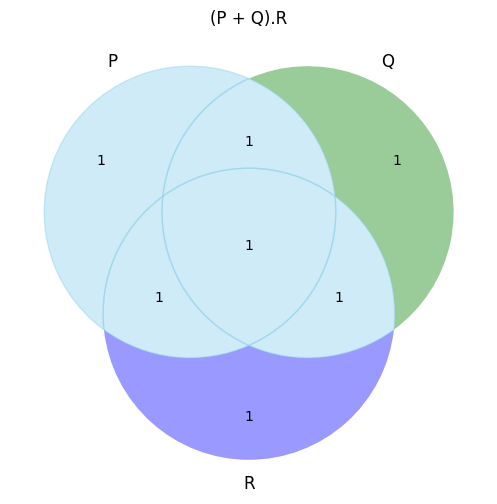

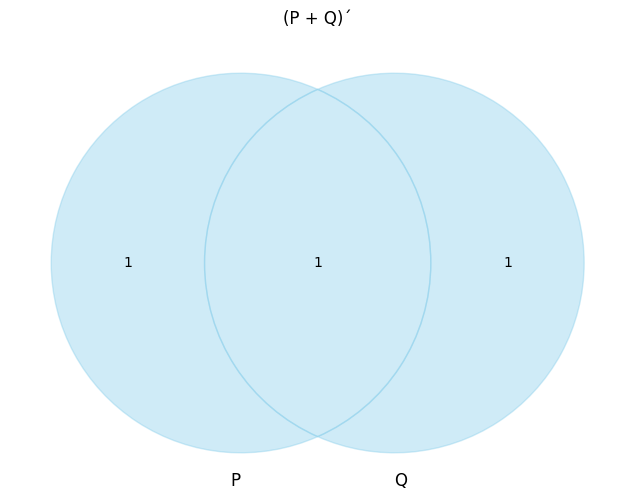

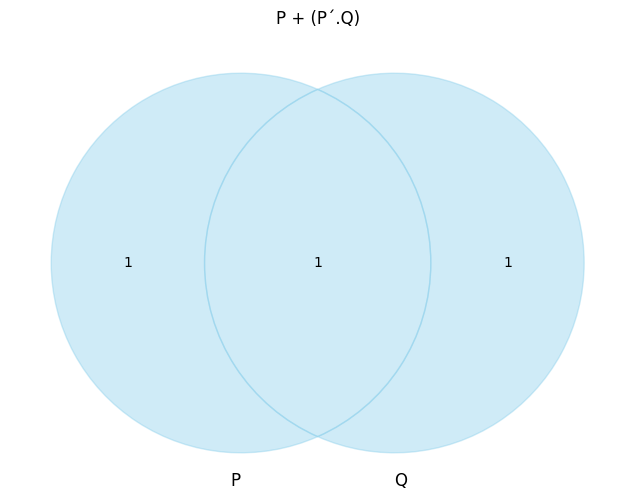

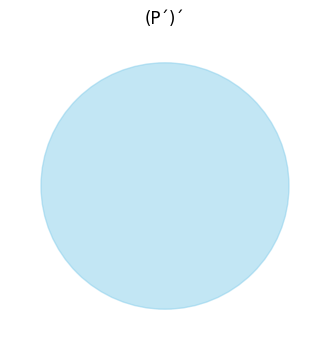

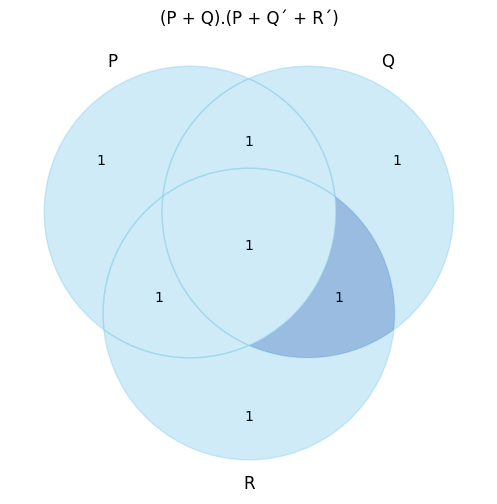

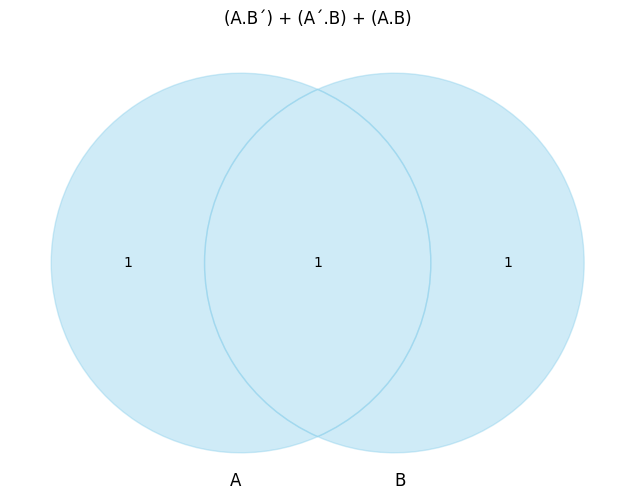

In [ ]:
import re
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

def parse_expression(expression):
    """Extrai variáveis e termos da expressão booleana."""
    expression = re.sub(r'\s+', '', expression)  # Remove espaços
    terms = expression.split('+')
    variables = set()

    # Extrai todas as variáveis (considerando negações)
    for term in terms:
        literals = re.findall(r'([A-Z]+)[´\']?', term)
        variables.update(literals)

    variables = sorted(variables)
    return terms, variables

def term_to_regions(term, variables):
    """Converte um termo (ex: P.Q´) para uma lista de regiões binárias."""
    lit_parts = re.findall(r'([A-Z]+)([´\']?)', term)
    lit_dict = {var: (neg != '') for (var, neg) in lit_parts}

    # Determina o número de variáveis ausentes no termo
    missing_vars = [var for var in variables if var not in lit_dict]
    n_missing = len(missing_vars)

    # Gera todas as combinações possíveis para as variáveis ausentes
    regions = []
    for i in range(2 ** n_missing):
        missing_values = format(i, f'0{n_missing}b')
        current_region = []
        for var in variables:
            if var in lit_dict:
                current_region.append('0' if lit_dict[var] else '1')
            else:
                current_region.append(missing_values[missing_vars.index(var)])
        regions.append(''.join(current_region))

    return regions

def draw_venn(expression, filename=None):
    """Desenha o Diagrama de Venn para a expressão."""
    terms, variables = parse_expression(expression)
    n_vars = len(variables)

    if n_vars == 1:
        # Caso especial: 1 variável
        plt.figure(figsize=(4, 4))
        circle = plt.Circle((0.5, 0.5), 0.4, color='skyblue', alpha=0.5)
        plt.gca().add_patch(circle)
        plt.gca().set_xlim(0, 1)
        plt.gca().set_ylim(0, 1)
        plt.title(expression)
        plt.axis('off')
        if filename:
            plt.savefig(filename)
        else:
            plt.show()
        plt.close()
        return
    elif n_vars not in [2, 3]:
        raise ValueError("Apenas 1, 2 ou 3 variáveis são suportadas.")

    # Determina todas as regiões ativas
    active_regions = set()
    for term in terms:
        regions = term_to_regions(term, variables)
        active_regions.update(regions)

    # Configura o diagrama
    plt.figure(figsize=(8, 6))
    if n_vars == 2:
        v = venn2(subsets=(1, 1, 1), set_labels=variables)
        for region in active_regions:
            if region == '10':
                v.get_patch_by_id('10').set_color('skyblue')
            elif region == '01':
                v.get_patch_by_id('01').set_color('skyblue')
            elif region == '11':
                v.get_patch_by_id('11').set_color('skyblue')
    else:
        v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels=variables)
        for region in active_regions:
            try:
                v.get_patch_by_id(region).set_color('skyblue')
            except KeyError:
                pass  # Ignora regiões que não existem no diagrama

    plt.title(expression)
    if filename:
        plt.savefig(filename)
    else:
        plt.show()
    plt.close()

# Exemplos de uso (Exercícios da Parte 2)
draw_venn("(X + Y).(X + Y´ + Z´)")  # (x + y) * (x + y´ + z´)
draw_venn("P + Q´")  # P ∨ ¬Q
draw_venn("P.Q´")  # P ∧ ¬Q
draw_venn("(P.Q´) + (P´.Q)")  # P XOR Q
draw_venn("(P + Q).R")  # (P ∨ Q) ∧ R
draw_venn("(P + Q)´")  # ¬(P ∨ Q) ≡ ¬P ∧ ¬Q
draw_venn("P + (P´.Q)")  # P ∨ (¬P ∧ Q) ≡ P ∨ Q
draw_venn("(P´)´")  # ¬(¬P) ≡ P
draw_venn("(P + Q).(P + Q´ + R´)")  # (P ∨ Q) ∧ (P ∨ ¬Q ∨ ¬R)
draw_venn("(A.B´) + (A´.B) + (A.B)")  # A XOR B ∨ (A ∧ B)